# **Model 4**

제작 : 박진재<br>
사용 기법 : VGG16 전이학습<br>
<img src="https://miro.medium.com/v2/resize:fit:857/1*AqqArOvacibWqeulyP_-8Q.png" width="400px"></img>
> **모델 간략한 소개**

1. EarlyStopping<br>
2. 5개 레이어 동결해제 학습<br>
3. 전이학습<br>

> **모델 성능**

ACC : **94.6540892124176%** <br>
LOSS : **0.18936669826507568** <br>
F1 SCORE : **0.9465361222370567** <br>

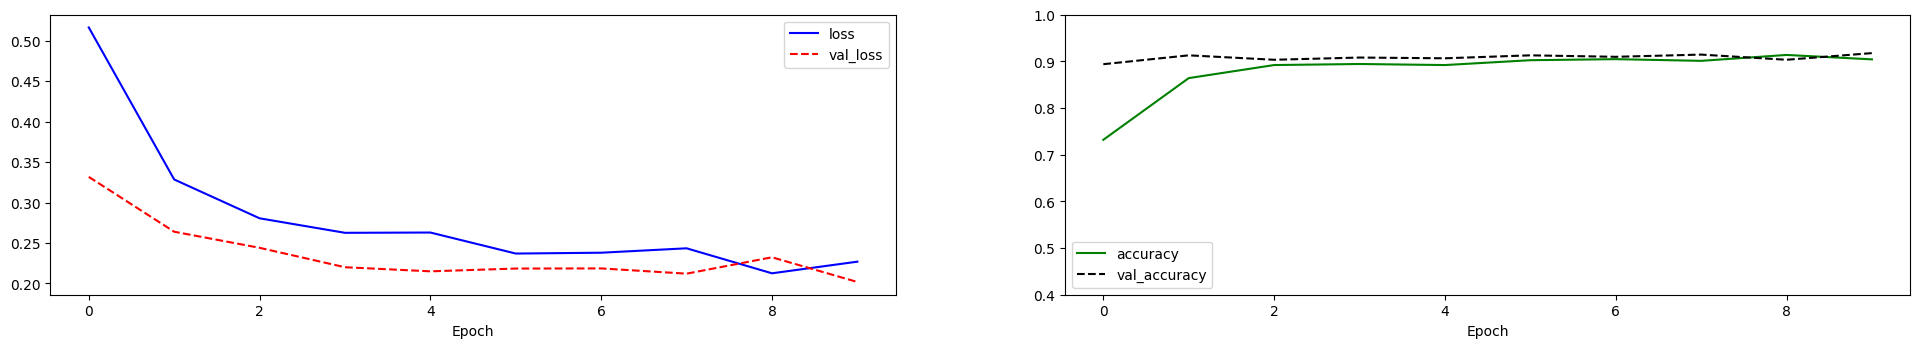

### **GPU 설정**

In [ ]:
import tensorflow as tf

# GPU 디바이스 확인
tf.test.gpu_device_name()

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# TensorFlow가 GPU를 사용할 수 있도록 설정합니다.
if len(tf.config.list_physical_devices('GPU')) > 0:
    print('GPU is enabled')
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)


Num GPUs Available:  1
GPU is enabled


### **모듈 import**

In [ ]:
import os
import tensorflow as tf

### **프로젝트 공통 설정**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_data_path = '/content/drive/MyDrive/PneumoniaClassifier/data/test'
val_data_path = '/content/drive/MyDrive/PneumoniaClassifier/data/val'
train_data_path = '/content/drive/MyDrive/PneumoniaClassifier/data/train'

In [ ]:
def count_data_number(path, name):
    pneumonia = 0
    normal = 0

    # pneumonia 폴더 내의 파일 개수 계산
    pneumonia_path = os.path.join(path, 'pneumonia')
    if os.path.exists(pneumonia_path):
        pneumonia = len(os.listdir(pneumonia_path))

    # normal 폴더 내의 파일 개수 계산
    normal_path = os.path.join(path, 'normal')
    if os.path.exists(normal_path):
        normal = len(os.listdir(normal_path))

    print(name, "pneumonia data : ", pneumonia)
    print(name, "normal data : ", normal)
    print()

    return pneumonia, normal

In [ ]:
count_data_number(train_data_path, "train")
count_data_number(val_data_path, "val")
count_data_number(test_data_path, "test")

train pneumonia data :  0
train normal data :  0

val pneumonia data :  0
val normal data :  0

test pneumonia data :  0
test normal data :  0



(0, 0)

## **모델 개발**

In [ ]:
input_shape = (200, 200, 3)
num_classes = 2
batch_size = 32

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(
    val_data_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 2216 images belonging to 2 classes.
Found 632 images belonging to 2 classes.
Found 318 images belonging to 2 classes.


In [ ]:
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
tf.keras.layers.Conv2D(128, (1, 1), padding = 'SAME', activation = None)(model.output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs=model.input, outputs=predictions)

for layer in model.layers:
    layer.trainable = False
for layer in model.layers[-5:]:
    layer.trainable = True

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                            

In [ ]:
epochs = 20

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    batch_size=10,
    callbacks=[early_stop]
)

Epoch 1/10
70/70 [==============================] - 63s 802ms/step - loss: 0.5164 - accuracy: 0.7319 - val_loss: 0.3317 - val_accuracy: 0.8940
Epoch 2/10
70/70 [==============================] - 53s 763ms/step - loss: 0.3285 - accuracy: 0.8642 - val_loss: 0.2639 - val_accuracy: 0.9130
Epoch 3/10
70/70 [==============================] - 52s 745ms/step - loss: 0.2805 - accuracy: 0.8921 - val_loss: 0.2440 - val_accuracy: 0.9035
Epoch 4/10
70/70 [==============================] - 53s 769ms/step - loss: 0.2626 - accuracy: 0.8944 - val_loss: 0.2200 - val_accuracy: 0.9082
Epoch 5/10
70/70 [==============================] - 59s 846ms/step - loss: 0.2629 - accuracy: 0.8921 - val_loss: 0.2150 - val_accuracy: 0.9066
Epoch 6/10
70/70 [==============================] - 55s 790ms/step - loss: 0.2369 - accuracy: 0.9025 - val_loss: 0.2184 - val_accuracy: 0.9130
Epoch 7/10
70/70 [==============================] - 53s 755ms/step - loss: 0.2380 - accuracy: 0.9048 - val_loss: 0.2186 - val_accuracy: 0.9098

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

10/10 [==============================] - 13s 1s/step - loss: 0.1894 - accuracy: 0.9465
Test Loss: 0.18936669826507568
Test Accuracy: 0.946540892124176


In [ ]:
model.save('/content/drive/MyDrive/PneumoniaClassifier/model/model4.h5')

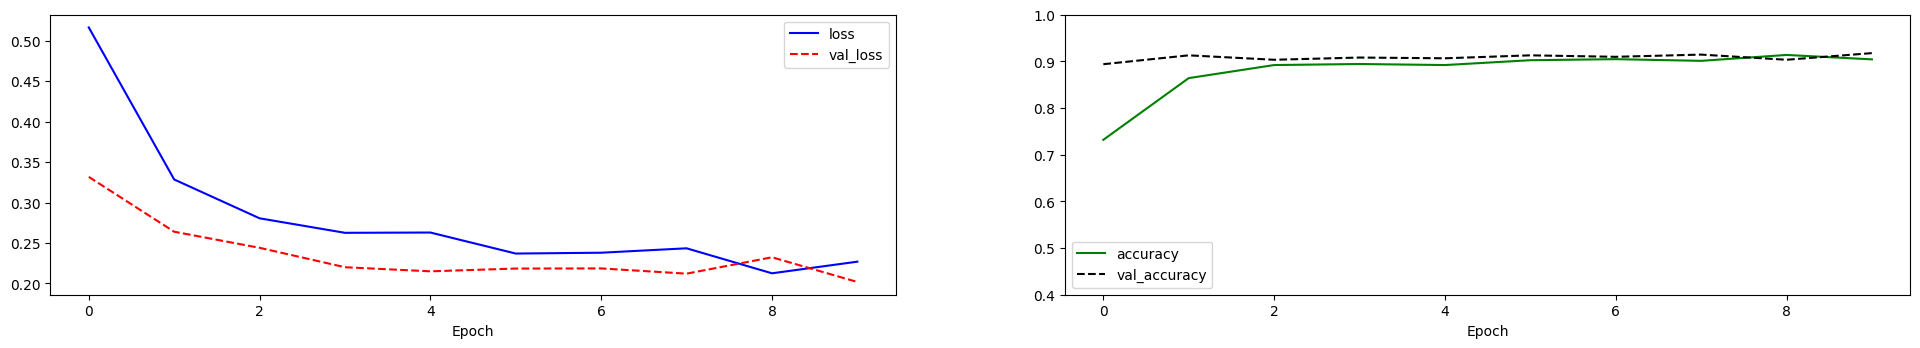

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,8))

plt.subplot(2,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.4,1.0)
plt.legend()

## **모델 평가**

In [ ]:
from sklearn.metrics import f1_score
import numpy as np
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = test_generator.classes

f1 = f1_score(y_true, y_pred_classes, average='weighted')
print('F1 Score:', f1)

10/10 [==============================] - 8s 566ms/step
F1 Score: 0.9465361222370567
